In [1]:
import sys
sys.path.append('../')
import numpy as np
import importlib
import dataloader as u
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation, Dropout, Input
from tensorflow.keras.regularizers import L1L2
import tensorflow.keras.backend as K
import pipeline as p
from tensorflow.keras.optimizers import Adam
import data
import models

importlib.reload(models)
importlib.reload(data)
importlib.reload(p)
importlib.reload(u)

Using TensorFlow backend.


<module 'dataloader' from '..\\dataloader.py'>

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [3]:
datadict = u.load_covid_timeseries(smoothing=5, cases_cutoff=5)

Reloading NYT data... May take a minute...


In [253]:
time_features = [
#     {
#         'name': 'cases_calibrated_smoothed',
#         'norm': False,
#         'diff_order': 1,
#         'target': True
#     },
    {
        'name': 'deaths_calibrated_smoothed',
        'norm': False,
        'diff_order': 1,
        'target': True
    },
]
dformat = {'time_features': time_features, 'time_context': False}

loader_args = {'smoothing': 5, 'cases_cutoff': 0, 'log': True}

In [259]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)

model_params = {
    'name': 'standard_LSTM',
    'lag_features': 14,
    'prediction_horizon': 14,
    'dropout': 0.1,
    'quantiles': 9,
    'loss': 'mse',
    'units': 16,
    'layers': 1,
    'optimizer': opt,
    'reg': (0, 0)
}

training_params = {
    'val_steps': 1,
    'predict_time': 0,
    'epochs': 50,
    'batch_size': 512,
    'verbose': 2,
    'dense': False,
}

horizon=14

In [260]:
importlib.reload(data)
importlib.reload(p)
importlib.reload(u)
importlib.reload(models)

<module 'models' from '..\\models.py'>

In [261]:
pipeline = p.Pipeline(dformat, model_params, training_params, horizon, loader_args)

In [262]:
print(pipeline.X_train.shape, pipeline.y_train.shape, pipeline.X_test.shape, pipeline.y_test.shape)

(16600, 14, 1) (16600, 14, 1) (1794, 14, 1) (1794, 14, 1)


In [263]:
pipeline.run()

Epoch 1/50
33/33 - 1s - loss: 0.1054 - time_distributed_120_loss: 0.0221 - time_distributed_121_loss: 0.0181 - time_distributed_122_loss: 0.0145 - time_distributed_123_loss: 0.0145 - time_distributed_124_loss: 0.0111 - time_distributed_125_loss: 0.0101 - time_distributed_126_loss: 0.0073 - time_distributed_127_loss: 0.0050 - time_distributed_128_loss: 0.0027 - val_loss: 0.0541 - val_time_distributed_120_loss: 0.0109 - val_time_distributed_121_loss: 0.0089 - val_time_distributed_122_loss: 0.0075 - val_time_distributed_123_loss: 0.0076 - val_time_distributed_124_loss: 0.0058 - val_time_distributed_125_loss: 0.0054 - val_time_distributed_126_loss: 0.0037 - val_time_distributed_127_loss: 0.0026 - val_time_distributed_128_loss: 0.0017
Epoch 2/50
33/33 - 1s - loss: 0.1011 - time_distributed_120_loss: 0.0202 - time_distributed_121_loss: 0.0167 - time_distributed_122_loss: 0.0141 - time_distributed_123_loss: 0.0140 - time_distributed_124_loss: 0.0111 - time_distributed_125_loss: 0.0101 - time_

Epoch 13/50
33/33 - 1s - loss: 0.0894 - time_distributed_120_loss: 0.0136 - time_distributed_121_loss: 0.0131 - time_distributed_122_loss: 0.0132 - time_distributed_123_loss: 0.0131 - time_distributed_124_loss: 0.0113 - time_distributed_125_loss: 0.0100 - time_distributed_126_loss: 0.0072 - time_distributed_127_loss: 0.0050 - time_distributed_128_loss: 0.0029 - val_loss: 0.0510 - val_time_distributed_120_loss: 0.0068 - val_time_distributed_121_loss: 0.0078 - val_time_distributed_122_loss: 0.0084 - val_time_distributed_123_loss: 0.0082 - val_time_distributed_124_loss: 0.0061 - val_time_distributed_125_loss: 0.0054 - val_time_distributed_126_loss: 0.0037 - val_time_distributed_127_loss: 0.0027 - val_time_distributed_128_loss: 0.0017
Epoch 14/50
33/33 - 1s - loss: 0.0890 - time_distributed_120_loss: 0.0134 - time_distributed_121_loss: 0.0130 - time_distributed_122_loss: 0.0132 - time_distributed_123_loss: 0.0131 - time_distributed_124_loss: 0.0112 - time_distributed_125_loss: 0.0100 - tim

Epoch 25/50
33/33 - 1s - loss: 0.0867 - time_distributed_120_loss: 0.0119 - time_distributed_121_loss: 0.0124 - time_distributed_122_loss: 0.0130 - time_distributed_123_loss: 0.0129 - time_distributed_124_loss: 0.0113 - time_distributed_125_loss: 0.0099 - time_distributed_126_loss: 0.0073 - time_distributed_127_loss: 0.0051 - time_distributed_128_loss: 0.0029 - val_loss: 0.0512 - val_time_distributed_120_loss: 0.0063 - val_time_distributed_121_loss: 0.0079 - val_time_distributed_122_loss: 0.0088 - val_time_distributed_123_loss: 0.0083 - val_time_distributed_124_loss: 0.0062 - val_time_distributed_125_loss: 0.0054 - val_time_distributed_126_loss: 0.0038 - val_time_distributed_127_loss: 0.0027 - val_time_distributed_128_loss: 0.0017
Epoch 26/50
33/33 - 1s - loss: 0.0864 - time_distributed_120_loss: 0.0118 - time_distributed_121_loss: 0.0124 - time_distributed_122_loss: 0.0130 - time_distributed_123_loss: 0.0129 - time_distributed_124_loss: 0.0112 - time_distributed_125_loss: 0.0099 - tim

Epoch 37/50
33/33 - 1s - loss: 0.0853 - time_distributed_120_loss: 0.0111 - time_distributed_121_loss: 0.0121 - time_distributed_122_loss: 0.0129 - time_distributed_123_loss: 0.0129 - time_distributed_124_loss: 0.0112 - time_distributed_125_loss: 0.0098 - time_distributed_126_loss: 0.0072 - time_distributed_127_loss: 0.0050 - time_distributed_128_loss: 0.0029 - val_loss: 0.0513 - val_time_distributed_120_loss: 0.0061 - val_time_distributed_121_loss: 0.0081 - val_time_distributed_122_loss: 0.0091 - val_time_distributed_123_loss: 0.0083 - val_time_distributed_124_loss: 0.0062 - val_time_distributed_125_loss: 0.0054 - val_time_distributed_126_loss: 0.0037 - val_time_distributed_127_loss: 0.0027 - val_time_distributed_128_loss: 0.0017
Epoch 38/50
33/33 - 1s - loss: 0.0852 - time_distributed_120_loss: 0.0110 - time_distributed_121_loss: 0.0121 - time_distributed_122_loss: 0.0129 - time_distributed_123_loss: 0.0129 - time_distributed_124_loss: 0.0112 - time_distributed_125_loss: 0.0098 - tim

Epoch 49/50
33/33 - 1s - loss: 0.0845 - time_distributed_120_loss: 0.0106 - time_distributed_121_loss: 0.0120 - time_distributed_122_loss: 0.0129 - time_distributed_123_loss: 0.0128 - time_distributed_124_loss: 0.0112 - time_distributed_125_loss: 0.0098 - time_distributed_126_loss: 0.0072 - time_distributed_127_loss: 0.0050 - time_distributed_128_loss: 0.0029 - val_loss: 0.0515 - val_time_distributed_120_loss: 0.0061 - val_time_distributed_121_loss: 0.0082 - val_time_distributed_122_loss: 0.0092 - val_time_distributed_123_loss: 0.0083 - val_time_distributed_124_loss: 0.0062 - val_time_distributed_125_loss: 0.0053 - val_time_distributed_126_loss: 0.0037 - val_time_distributed_127_loss: 0.0027 - val_time_distributed_128_loss: 0.0017
Epoch 50/50
33/33 - 1s - loss: 0.0847 - time_distributed_120_loss: 0.0106 - time_distributed_121_loss: 0.0120 - time_distributed_122_loss: 0.0129 - time_distributed_123_loss: 0.0128 - time_distributed_124_loss: 0.0113 - time_distributed_125_loss: 0.0098 - tim

In [264]:
predictions = pipeline.get_predictions()

In [131]:
predictions[1].shape

(3143, 115)

In [21]:
pipeline.model = load_model('LSTM_model2.h5')

In [25]:
pipeline.predictions = pipeline.predict(t=pipeline.lag, dense=False)

In [158]:
print(predictions[0][1].shape)

(3143, 115)


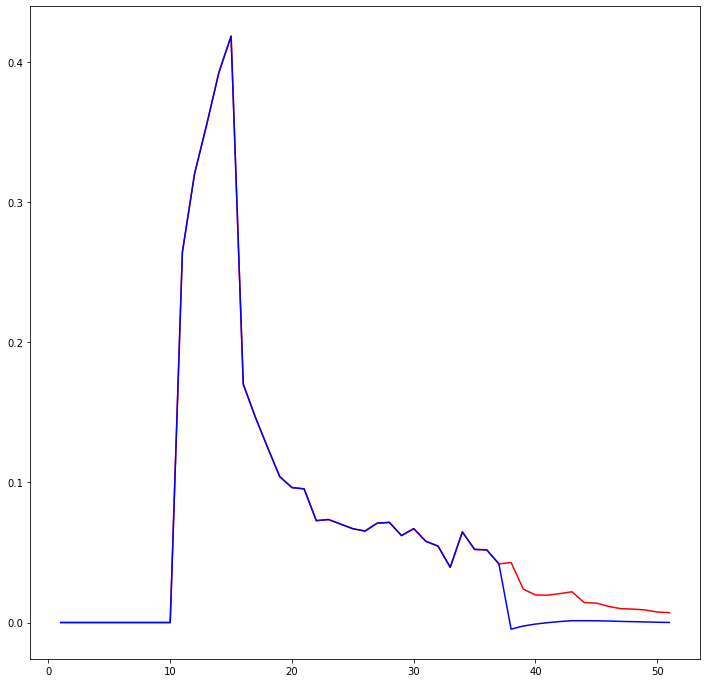

In [267]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

county = 1868

###

d1 = 10**pipeline.data.original()[0]

f = pipeline.data.time_features[0].series[county]
s = np.argmax(np.isnan(f))
d1 = f[:s]

x1 = np.linspace(1, d1.shape[0], d1.shape[0])
plt.plot(x1, d1, color='red')

###
#d2 = 10**predictions[1][county]

d2 = np.concatenate([d1[:s - 14], pipeline.predictions[8, county, :, 0]])

x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2, d2, color='blue')

plt.show()

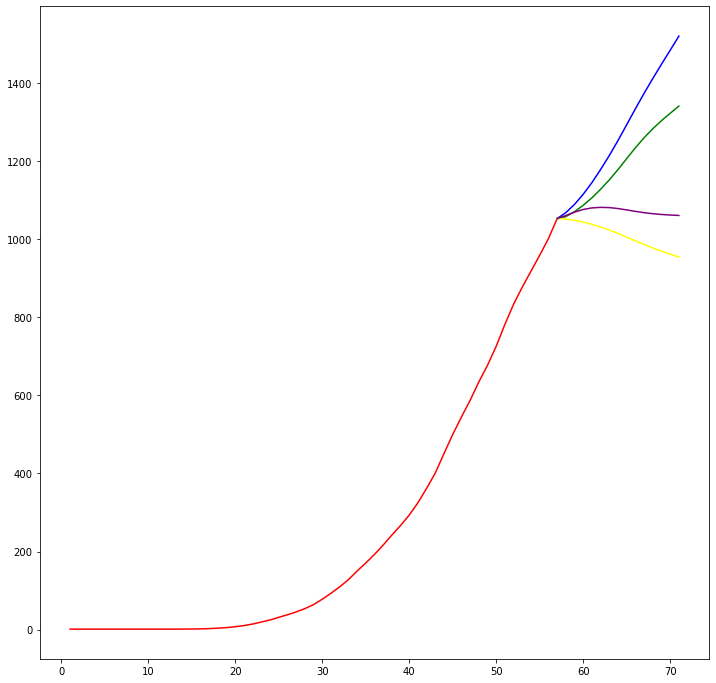

In [251]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

county = 204

###

d1 = 10**pipeline.data.original()[1][county]
x1 = np.linspace(1, d1.shape[0], d1.shape[0])
plt.plot(x1, d1, color='red')

###
d2 = 10**predictions[2][1][county]
s = np.argmax(np.isnan(d2))
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s - 15:], d2[s - 15:], color='blue')

d2 = 10**predictions[6][1][county]
s = np.argmax(np.isnan(d2))
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s - 15:], d2[s - 15:], color='green')

d2 = 10**predictions[7][1][county]
s = np.argmax(np.isnan(d2))
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s - 15:], d2[s - 15:], color='yellow')

d2 = 10**predictions[4][1][county]
s = np.argmax(np.isnan(d2))
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s - 15:], d2[s - 15:], color='purple')


plt.show()

In [201]:
demo = u.load_covid_static()
demo[demo['County Name'] == 'Somerset County']

,FIPS,County Name,cases,deaths,log_cases,log_deaths
1189,23025,Somerset County,NaN,NaN,NaN,NaN
1211,24039,Somerset County,NaN,NaN,NaN,NaN
1791,34035,Somerset County,NaN,NaN,NaN,NaN
2299,42111,Somerset County,NaN,NaN,NaN,NaN


In [87]:
pipeline.model.save('LSTM_model2.h5')